In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_derivative_polar(mu, grad_example, range_m = 8, reso = 20):
    # create initial values for the grid plot
    rs = np.linspace(-range_m, range_m, reso)
    js = np.linspace(-range_m, range_m, reso)

    x_grid, y_grid = np.meshgrid(rs, js)

    # make into array for fast process
    x_array = x_grid.reshape([1, -1])
    y_array = y_grid.reshape([1, -1])
    r_array = np.sqrt(x_array*x_array + y_array*y_array)
    theta_array = np.arctan2(y_array, x_array)
    
    x_y_array = np.concatenate((r_array, theta_array), axis=0)
    deri_array = grad_example(x_y_array, mu)
    
    result = np.empty(deri_array.shape)
    sin_theta = np.sin(theta_array)
    cos_theta = np.cos(theta_array)
    result[0, :] = cos_theta * deri_array[0, :] - r_array * sin_theta * deri_array[1, :]
    result[1, :] = sin_theta * deri_array[0, :] + r_array * cos_theta * deri_array[1, :]
    result = result / np.linalg.norm(result, axis=0)
    
    fig = plt.quiver(x_array, y_array, result[0, :], result[1, :], color='r')

# Poincare Bendixson examples
$$
\dot{r} = r(1-r^{2}) + \mu r \cos \theta
$$
$$
\dot{\theta} = 1
$$

In [9]:
def grad_example(x, mu):
    """ the gradient of the upper function
    """
    
    result = np.ones(x.shape)
    cos_theta = np.cos(x[1, :])
    
    r = x[0, :]
    result[0, :] = r * (1 - r*r) + mu * r * cos_theta
    
    return result

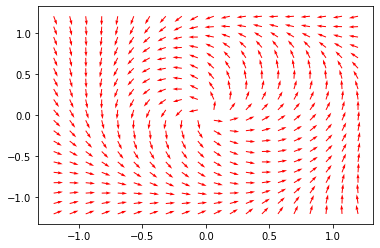

In [14]:
plot_derivative_polar(0.5, grad_example, 1.2)

## glycolysis

$$
\dot{x} = - x + ay + x^{2}y
$$
$$
\dot{y} = b - ay - x^{2}y
$$

In [46]:
def grad_example(x, a, b):
    """ the gradient of the upper function
    """
    
    result = np.empty(x.shape)
    xsqr_y = x[0, :] * x[0, :] * x[1, :]
    result[0, :] = - x[0, :] + a * x[1, :] + xsqr_y
    result[1, :] = b - a * x[1, :] - xsqr_y
    
    result = result / np.linalg.norm(result, axis=0)
    return result

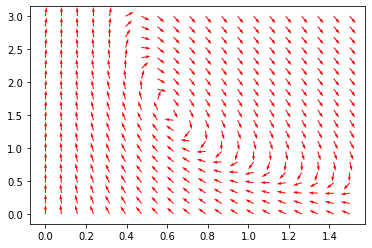

In [53]:
def plot_derivative(a, b, start, end, reso = 20):
    # create initial values for the grid plot
    rs = np.linspace(-start[0], end[0], reso)
    js = np.linspace(-start[1], end[1], reso)

    r_grid, j_grid = np.meshgrid(rs, js)

    # make into array for fast process
    r_array = r_grid.reshape([1, -1])
    j_array = j_grid.reshape([1, -1])
    r_j_array = np.concatenate((r_array, j_array), axis=0)

    deri_array = grad_example(r_j_array, a, b)
    
    # reshape back intogrid
    us = deri_array[0, :]
    vs = deri_array[1, :]
    
    fig = plt.quiver(r_array, j_array, us, vs, color='r')

plot_derivative(0.02, 0.6, [0, 0] , [1.5, 3])

# Van der Pol

$$
\dot{x} = \mu(y-F(x)) = \mu(y-\frac{1}{3}x^{3}+x)
$$
$$
\dot{y} = - \frac{1}{\mu}x
$$

In [61]:
def grad_example(x, mu, norm=True):
    """ the gradient of the upper function
    """
    
    result = np.empty(x.shape)
    result[0, :] = mu * (x[1, :] - x[0, :]*x[0, :]*x[0, :]/3 + x[0, :])
    result[1, :] = - x[0, :] / mu
    
    if norm:
        result = result / np.linalg.norm(result, axis=0)
    return result

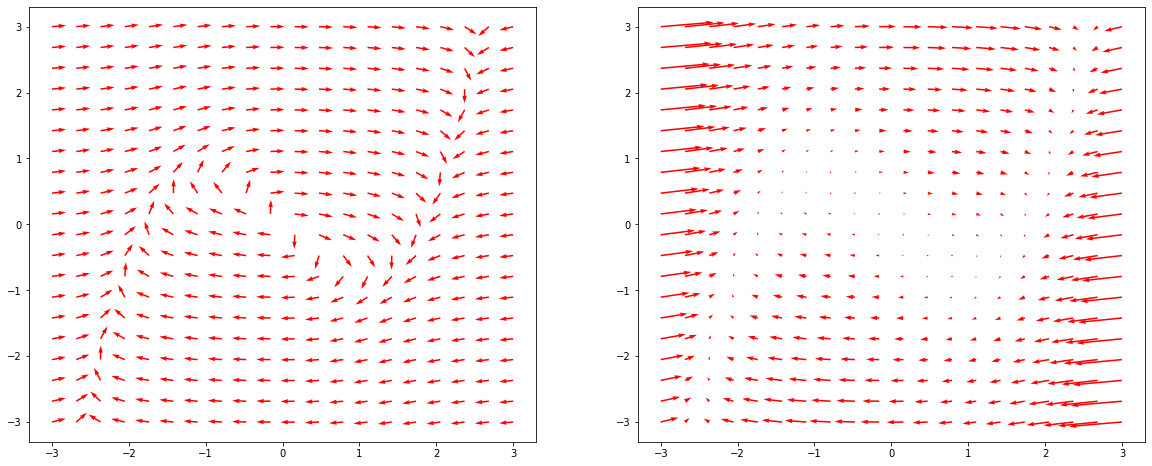

In [70]:
def plot_derivative(mu, norm, start, end, reso = 20):
    # create initial values for the grid plot
    rs = np.linspace(start[0], end[0], reso)
    js = np.linspace(start[1], end[1], reso)

    r_grid, j_grid = np.meshgrid(rs, js)

    # make into array for fast process
    r_array = r_grid.reshape([1, -1])
    j_array = j_grid.reshape([1, -1])
    r_j_array = np.concatenate((r_array, j_array), axis=0)

    deri_array = grad_example(r_j_array, mu, norm)
    
    # reshape back intogrid
    us = deri_array[0, :]
    vs = deri_array[1, :]
    
    fig = plt.quiver(r_array, j_array, us, vs, color='r')

plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_derivative(2, True, [-3, -3] , [3, 3])

plt.subplot(122)
plot_derivative(2, False, [-3, -3] , [3, 3])

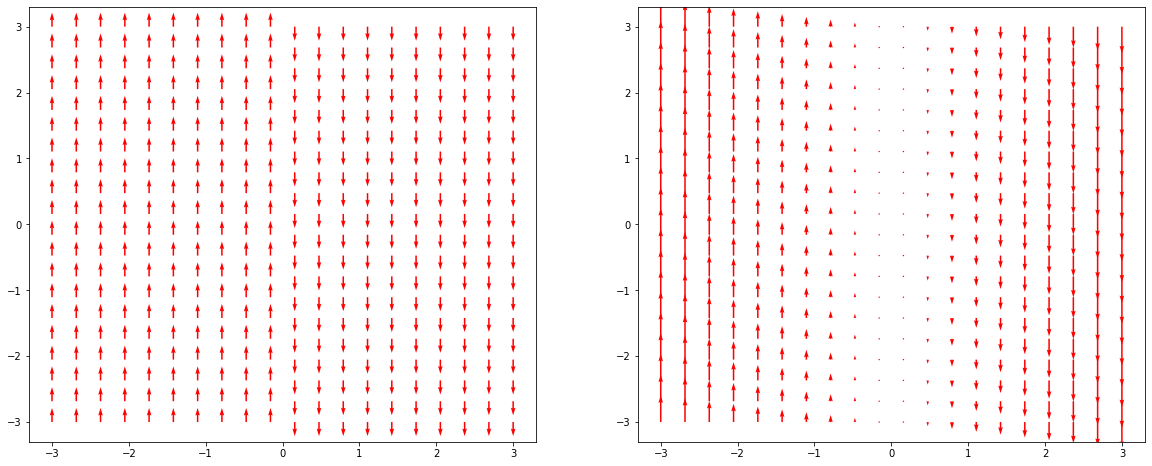

In [71]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_derivative(0.0001, True, [-3, -3] , [3, 3])

plt.subplot(122)
plot_derivative(0.0001, False, [-3, -3] , [3, 3])

In [15]:
def grad_example(x, mu, b=1.0, omega=1.0):
    """ the gradient of the upper function
    """
    
    result = np.ones(x.shape)    
    r = x[0, :]
    result[0, :] = mu * r - r * r * r
    result[1, :] = omega + b * r * r
    return result

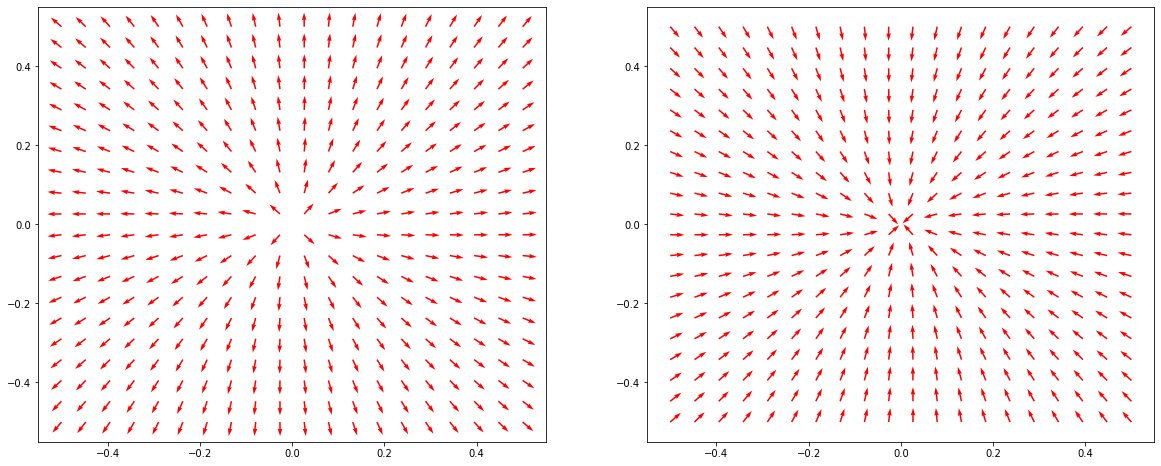

In [21]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_derivative_polar(20, grad_example, 0.5)

plt.subplot(122)
plot_derivative_polar(-20, grad_example, 0.5)